In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
df=pd.read_csv("Dataset/placement.csv")
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


<AxesSubplot:ylabel='Count'>

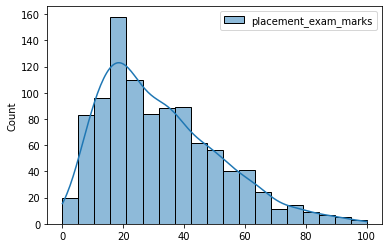

In [38]:
sns.histplot(df[['placement_exam_marks']],kde=True)  # skewed data we can use IQR here

/home/gaurav/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='placement_exam_marks'>

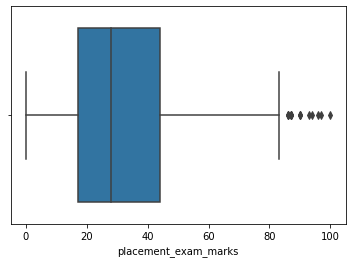

In [39]:
sns.boxplot(df['placement_exam_marks'])

In [40]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

In [41]:
p_25=df['placement_exam_marks'].quantile(0.25)
p_75=df['placement_exam_marks'].quantile(0.75)

In [42]:
p_75

44.0

In [43]:
IQR=p_75-p_25
IQR

27.0

In [44]:

upper_limit=p_75+1.5*IQR
lower_limit=p_25-1.5*IQR

In [45]:
upper_limit

84.5

In [46]:
lower_limit

-23.5

In [47]:
df[df['placement_exam_marks']>upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [48]:
df[df['placement_exam_marks']<lower_limit]

,cgpa,placement_exam_marks,placed


In [50]:
# 1. Trimming
new_df=df[(df['placement_exam_marks']<upper_limit) & (df['placement_exam_marks']>lower_limit)]
new_df.shape

(985, 3)

<AxesSubplot:xlabel='placement_exam_marks', ylabel='Count'>

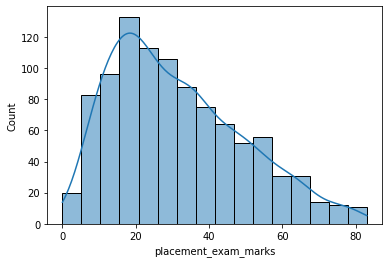

In [51]:
sns.histplot(new_df['placement_exam_marks'],kde=True)

<AxesSubplot:>

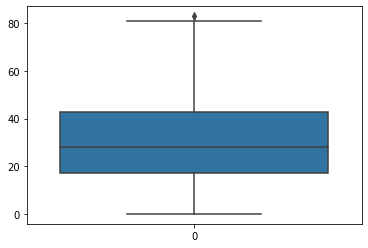

In [53]:
sns.boxplot(data=new_df['placement_exam_marks'])

In [ ]:
# 2. capping